In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("RELIANCE.NS.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-25,2034.949951,2034.949951,1932.0,1941.000000,1922.178345,25016570.0
1,2021-01-27,1925.000000,1925.000000,1888.0,1895.000000,1876.624512,19553809.0
2,2021-01-28,1880.150024,1923.300049,1870.0,1876.550049,1858.353394,15722291.0
3,2021-01-29,1894.300049,1913.099976,1830.0,1841.949951,1824.088867,20173258.0
4,2021-02-01,1859.400024,1905.000000,1848.0,1895.300049,1876.921509,15774504.0


In [3]:
data.drop(data.index[-1], inplace=True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
735,2024-01-15,2750.000000,2792.899902,2732.000000,2788.250000,2788.250000,4305297.0
736,2024-01-16,2779.949951,2792.600098,2741.000000,2749.250000,2749.250000,4534512.0
737,2024-01-17,2719.000000,2772.550049,2710.050049,2723.149902,2723.149902,6098691.0
738,2024-01-18,2702.800049,2742.000000,2702.500000,2735.899902,2735.899902,5139719.0
739,2024-01-19,2752.000000,2752.000000,2718.000000,2734.899902,2734.899902,5211352.0


In [4]:
# This data contains 740 rows of data of past 3 years - 01/25/2021 - 01/19/2024

In [5]:
data['Date'] = pd.to_datetime(data['Date'])

In [6]:
class CandlestickChart:
    def __init__(self, data, column_names=['Date', 'Open', 'High', 'Low', 'Close']):
        self.data = data
        self.column_names = column_names

    def plot_candlestick(self):
        candlestick_data = self.data[self.column_names]

        candlestick_trace = go.Candlestick(x=candlestick_data['Date'],
                                           open=candlestick_data['Open'],
                                           high=candlestick_data['High'],
                                           low=candlestick_data['Low'],
                                           close=candlestick_data['Close'])

        fig = go.Figure(data=[candlestick_trace])

        fig.update_layout(title='Candlestick Chart',
                          xaxis_title='Date',
                          yaxis_title='Price',
                          xaxis_rangeslider_visible=False)

        fig.show()

candlestick_chart = CandlestickChart(data)
candlestick_chart.plot_candlestick()


In [7]:
# class TechnicalIndicators:
#   def __init__(self, data):
#     self.data = data

#   def moving_average(self, column='Close', length=9):
#       close_values = self.data[column].values
#       ma_values = []

#       for i in range(len(close_values)):
#           if i < length - 1:
#               ma_values.append(0)
#           else:
#               ma_values.append(sum(close_values[i - length + 1 : i + 1]) / length)

#       return ma_values



#   def plot_moving_average(self, column = "Close", length = 9):
#     ma_values = self.moving_average(column, length)

#     plt.figure(figsize=(12, 6))
#     plt.plot(self.data['Date'], self.data[column], label=f'{column} Prices')
#     plt.plot(self.data['Date'], ma_values, label=f'{length}-Day Moving Average', color='orange', linestyle='--')
#     plt.title(f'{column} Prices and {length}-Day Moving Average')
#     plt.xlabel('Date')
#     plt.ylabel('Price')
#     plt.legend()
#     plt.show()

#   def relative_strength_index(self, column='Close', periods=14):
#       close_values = self.data[column]

#       delta = close_values.diff(1)

#       gain = np.where(delta > 0, delta, 0)
#       loss = np.where(delta < 0, -delta, 0)

#       avg_gain = pd.Series(gain).rolling(window=periods, min_periods=1).mean()
#       avg_loss = pd.Series(loss).rolling(window=periods, min_periods=1).mean()

#       rs = np.divide(avg_gain, avg_loss, out=np.zeros_like(avg_gain), where=avg_loss != 0)
#       rsi = 100 - (100 / (1 + rs))

#       return rsi.values

#   def plot_rsi(self, column='Close', periods=14, overbought_threshold=70, oversold_threshold=30):
#         rsi_values = self.relative_strength_index(column, periods)
#         dates = self.data['Date'].iloc[periods - 1:].reset_index(drop=True)

#         rsi_values = rsi_values[:len(dates)]

#         plt.figure(figsize=(12, 6))
#         plt.plot(dates, rsi_values, label=f'RSI ({periods} days)')

#         plt.axhline(overbought_threshold, color='r', linestyle='--', label=f'Overbought Threshold ({overbought_threshold})')
#         plt.axhline(oversold_threshold, color='g', linestyle='--', label=f'Oversold Threshold ({oversold_threshold})')

#         plt.title(f'Relative Strength Index (RSI) for {column}')
#         plt.xlabel('Date')
#         plt.ylabel('RSI')
#         plt.legend()
#         plt.show()

#   def exponential_moving_average(self, values, window=9):
#         weights = [np.exp(-i) for i in range(window)]
#         weights_sum = sum(weights)

#         ema = np.zeros(window - 1)
#         for i in range(window - 1, len(values)):
#             ema_value = sum(w * v for w, v in zip(weights, values[i - window + 1:i + 1])) / weights_sum
#             ema = np.append(ema, ema_value)

#         return ema

#   def macd(self, column='Close', short_window=12, long_window=26, signal_window=9):
#         close_values = self.data[column].values

#         short_ema = self.exponential_moving_average(close_values, window=short_window)
#         long_ema = self.exponential_moving_average(close_values, window=long_window)

#         macd_line = short_ema - long_ema

#         signal_line = self.exponential_moving_average(macd_line, window=signal_window)

#         histogram = macd_line - signal_line

#         return macd_line, signal_line, histogram

#   def plot_macd(self, column='Close', short_window=12, long_window=26, signal_window=9):
#     macd_line, signal_line, histogram = self.macd(column, short_window, long_window, signal_window)

#     histogram = np.clip(histogram, -500, 500)

#     dates = self.data['Date'].iloc[long_window + signal_window - 2:].reset_index(drop=True)

#     min_length = min(len(dates), len(macd_line), len(signal_line), len(histogram))
#     dates = dates[:min_length]
#     macd_line = macd_line[:min_length]
#     signal_line = signal_line[:min_length]
#     histogram = histogram[:min_length]

#     plt.figure(figsize=(12, 8))
#     plt.plot(dates, macd_line, label='MACD Line', color='blue')
#     plt.plot(dates, signal_line, label='Signal Line', color='orange')

#     # Color the histogram bars based on their values
#     colors = ['green' if val >= 0 else 'red' for val in histogram]

#     # Increase the width of the bars for better visibility
#     plt.bar(dates, histogram, label='MACD Histogram', color=colors, alpha=0.8, width=0.5)

#     plt.title(f'MACD for {column}')
#     plt.xlabel('Date')
#     plt.ylabel('MACD')
#     plt.legend()
#     plt.show()

class TechnicalIndicators:
  def __init__(self, data):
        self.data = data

  def moving_average(self, column='Close', length=9):
        close_values = self.data[column].values
        ma_values = []

        for i in range(len(close_values)):
            if i < length - 1:
                ma_values.append(np.nan)
            else:
                ma_values.append(sum(close_values[i - length + 1: i + 1]) / length)

        return ma_values

  def plot_moving_average(self, column="Close", length=9):
        ma_values = self.moving_average(column, length)

        plt.figure(figsize=(12, 6))
        plt.plot(self.data['Date'], self.data[column], label=f'{column} Prices')
        plt.plot(self.data['Date'], ma_values, label=f'{length}-Day Moving Average', color='orange', linestyle='--')
        plt.title(f'{column} Prices and {length}-Day Moving Average')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.show()

  def relative_strength_index(self, column='Close', periods=14):
        close_values = self.data[column]

        delta = close_values.diff(1)

        gain = np.where(delta > 0, delta, 0)
        loss = np.where(delta < 0, -delta, 0)

        avg_gain = pd.Series(gain).rolling(window=periods, min_periods=1).mean()
        avg_loss = pd.Series(loss).rolling(window=periods, min_periods=1).mean()

        rs = np.divide(avg_gain, avg_loss, out=np.zeros_like(avg_gain), where=avg_loss != 0)
        rsi = 100 - (100 / (1 + rs))

        return rsi.values

  def plot_rsi(self, column='Close', periods=14, overbought_threshold=70, oversold_threshold=30):
        rsi_values = self.relative_strength_index(column, periods)
        dates = self.data['Date'].iloc[periods - 1:].reset_index(drop=True)

        rsi_values = rsi_values[:len(dates)]

        plt.figure(figsize=(12, 6))
        plt.plot(dates, rsi_values, label=f'RSI ({periods} days)')

        plt.axhline(overbought_threshold, color='r', linestyle='--', label=f'Overbought Threshold ({overbought_threshold})')
        plt.axhline(oversold_threshold, color='g', linestyle='--', label=f'Oversold Threshold ({oversold_threshold})')

        plt.title(f'Relative Strength Index (RSI) for {column}')
        plt.xlabel('Date')
        plt.ylabel('RSI')
        plt.legend()
        plt.show()

  def exponential_moving_average(self, values, window=9):
        weights = [np.exp(-i) for i in range(window)]
        weights_sum = sum(weights)

        ema = np.full(window - 1, np.nan)
        for i in range(window - 1, len(values)):
            ema_value = sum(w * v for w, v in zip(weights, values[i - window + 1:i + 1])) / weights_sum
            ema = np.append(ema, ema_value)

        return ema

  def macd(self, column='Close', short_window=12, long_window=26, signal_window=9):
        close_values = self.data[column].values

        short_ema = self.exponential_moving_average(close_values, window=short_window)
        long_ema = self.exponential_moving_average(close_values, window=long_window)

        macd_line = short_ema - long_ema

        signal_line = self.exponential_moving_average(macd_line, window=signal_window)

        histogram = macd_line - signal_line

        return macd_line, signal_line, histogram

  def plot_macd(self, column='Close', short_window=12, long_window=26, signal_window=9):
        macd_line, signal_line, histogram = self.macd(column, short_window, long_window, signal_window)

        histogram = np.clip(histogram, -500, 500)

        dates = self.data['Date'].iloc[long_window + signal_window - 2:].reset_index(drop=True)

        min_length = min(len(dates), len(macd_line), len(signal_line), len(histogram))
        dates = dates[:min_length]
        macd_line = macd_line[:min_length]
        signal_line = signal_line[:min_length]
        histogram = histogram[:min_length]

        plt.figure(figsize=(12, 8))
        plt.plot(dates, macd_line, label='MACD Line', color='blue')
        plt.plot(dates, signal_line, label='Signal Line', color='orange')

        colors = ['green' if val >= 0 else 'red' for val in histogram]

        plt.bar(dates, histogram, label='MACD Histogram', color=colors, alpha=0.8, width=0.5)

        plt.title(f'MACD for {column}')
        plt.xlabel('Date')
        plt.ylabel('MACD')
        plt.legend()
        plt.show()

  def bollinger_bands(self, column='Close', window=20, num_std=2):
        close_values = self.data[column].values

        middle_band = pd.Series(close_values).rolling(window=window).mean()

        rolling_std = pd.Series(close_values).rolling(window=window).std()
        upper_band = middle_band + (rolling_std * num_std)
        lower_band = middle_band - (rolling_std * num_std)

        return upper_band, middle_band, lower_band

  def plot_bollinger_bands(self, column='Close', window=20, num_std=2):
        close_values = self.data[column].values

        rolling_mean = pd.Series(close_values).rolling(window=window, min_periods=1).mean()
        rolling_std = pd.Series(close_values).rolling(window=window, min_periods=1).std()

        upper_band = rolling_mean + (num_std * rolling_std)
        lower_band = rolling_mean - (num_std * rolling_std)

        upper_band = upper_band[:len(close_values)]
        lower_band = lower_band[:len(close_values)]
        rolling_mean = rolling_mean[:len(close_values)]

        dates = self.data['Date'].reset_index(drop=True)

        plt.figure(figsize=(12, 6))
        plt.plot(dates, close_values, label=f'{column} Prices')
        plt.plot(dates, rolling_mean, label=f'{window}-Day Rolling Mean', color='orange', linestyle='--')
        plt.plot(dates, upper_band, label=f'Upper Bollinger Band', color='red', linestyle='--')
        plt.plot(dates, lower_band, label=f'Lower Bollinger Band', color='green', linestyle='--')

        plt.title(f'{column} Prices and Bollinger Bands')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.show()

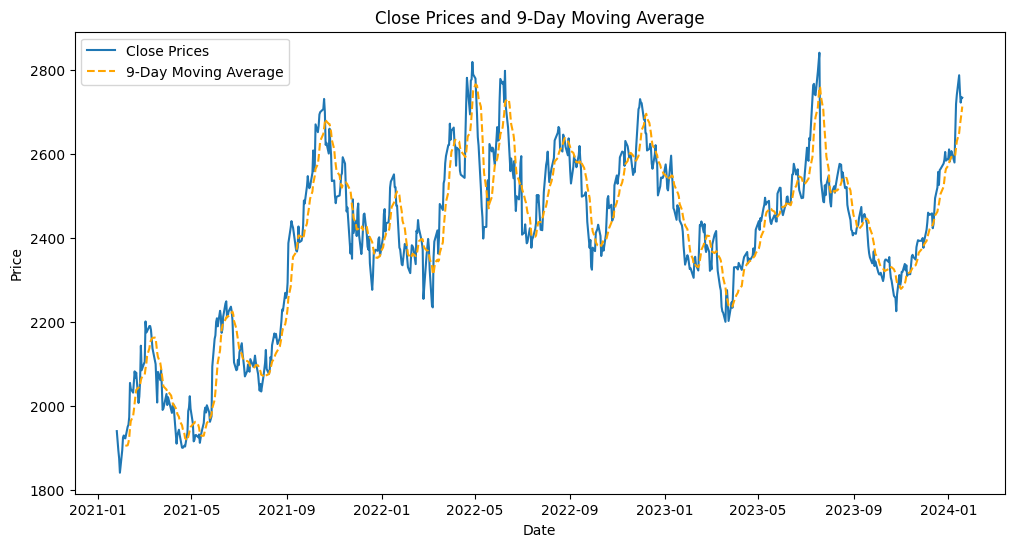

In [8]:
tech_indicators = TechnicalIndicators(data)

tech_indicators.plot_moving_average(column='Close', length=9)

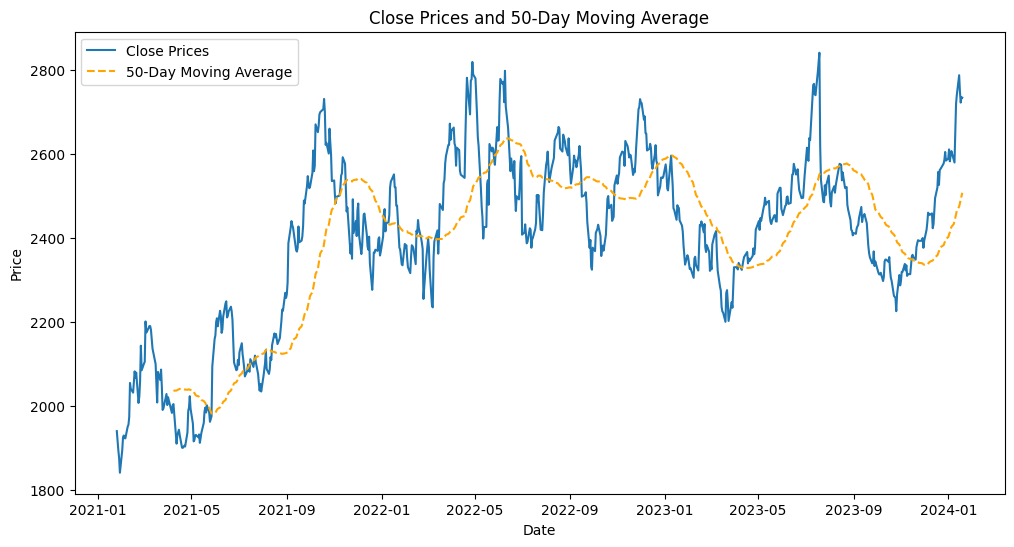

In [9]:
tech_indicators.plot_moving_average(column='Close', length = 50)

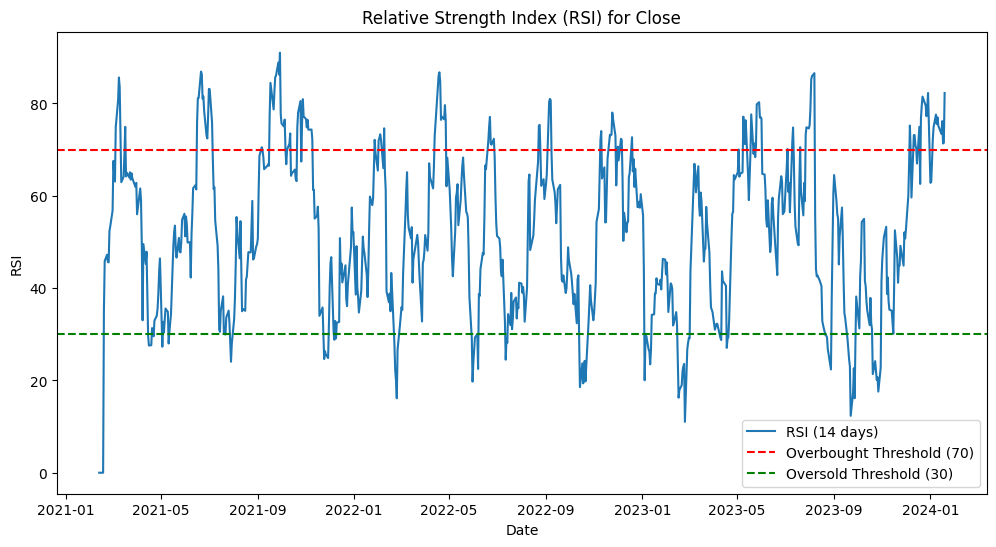

In [10]:
tech_indicators.plot_rsi(column='Close', periods=14, overbought_threshold=70, oversold_threshold=30)

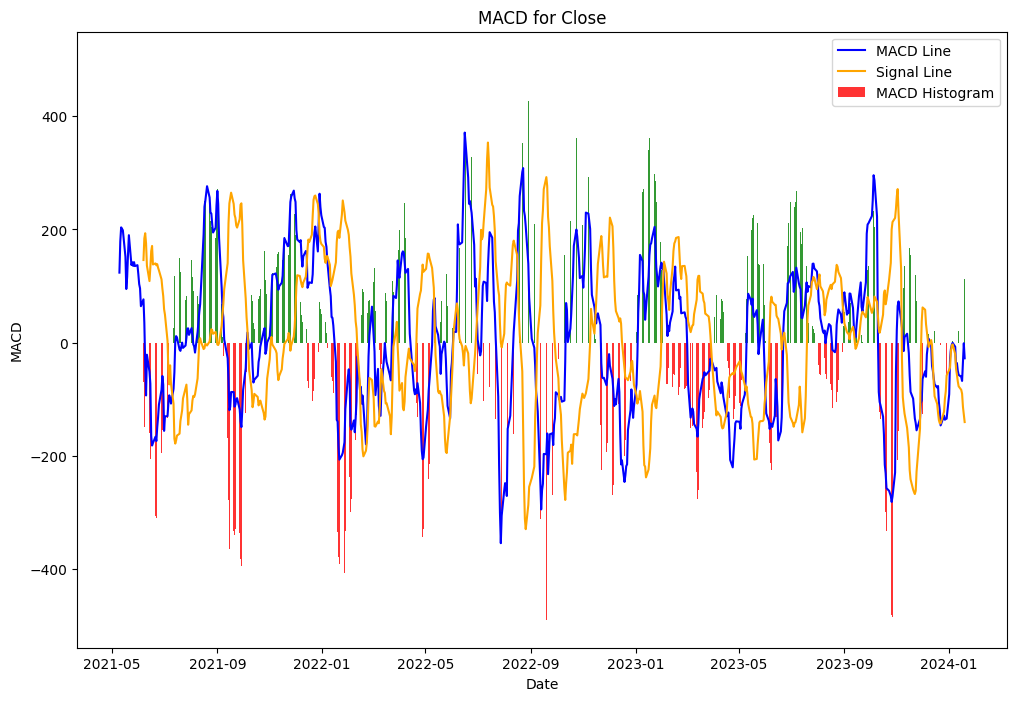

In [11]:
tech_indicators.plot_macd(column='Close', short_window=12, long_window=26, signal_window=20)

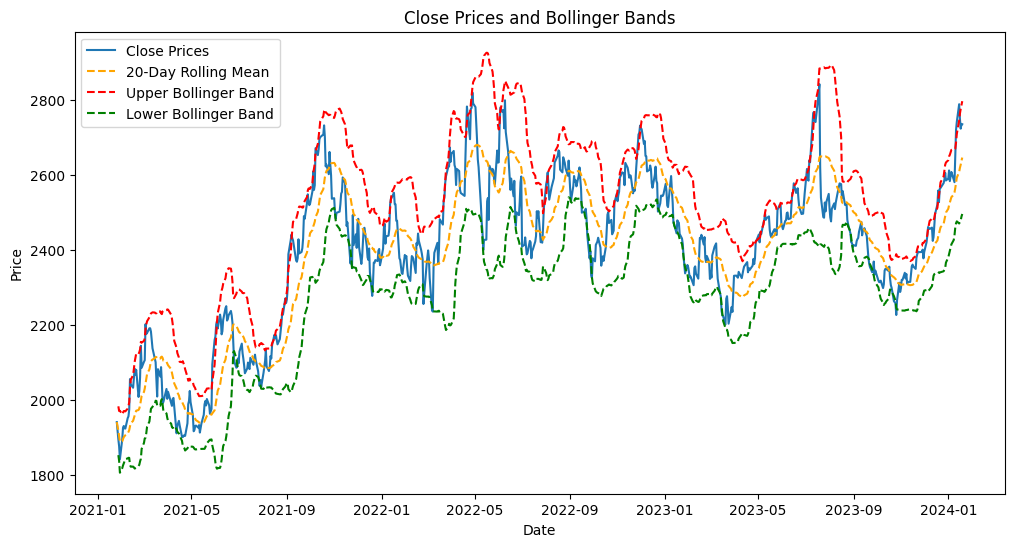

In [12]:
tech_indicators.plot_bollinger_bands(column='Close', window=20, num_std=2)

In [13]:
ma_values = tech_indicators.moving_average(column='Close', length=9)
rsi_values = tech_indicators.relative_strength_index(column='Close', periods=14)
macd_line, signal_line, histogram = tech_indicators.macd(column='Close', short_window=12, long_window=26, signal_window=9)
upper_band, middle_band, lower_band = tech_indicators.bollinger_bands(column='Close', window=20, num_std=2)

new_columns = {
    'MA': ma_values,
    'RSI': rsi_values,
    'MACD_Line': macd_line,
    'MACD_Signal_Line': signal_line,
    'MACD_Histogram': histogram,
    'Bollinger_Upper': upper_band,
    'Bollinger_Middle': middle_band,
    'Bollinger_Lower': lower_band
}

results = data.assign(**new_columns)

results.to_csv('new_data_with_technical_indicators.csv', index=False)

In [14]:
selected_columns = ['MA', 'RSI', 'MACD_Line', 'MACD_Signal_Line', 'MACD_Histogram', 'Bollinger_Upper', 'Bollinger_Middle', 'Bollinger_Lower']

selected_data = results[selected_columns]

correlation_matrix = selected_data.corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                        MA       RSI  MACD_Line  MACD_Signal_Line  \
MA                1.000000  0.091931   0.241760          0.223259   
RSI               0.091931  1.000000   0.229548          0.000850   
MACD_Line         0.241760  0.229548   1.000000          0.431528   
MACD_Signal_Line  0.223259  0.000850   0.431528          1.000000   
MACD_Histogram    0.045222  0.211613   0.547529         -0.518590   
Bollinger_Upper   0.942605 -0.081732   0.197549          0.280892   
Bollinger_Middle  0.965689 -0.099315   0.163566          0.243084   
Bollinger_Lower   0.924820 -0.112857   0.111638          0.179909   

                  MACD_Histogram  Bollinger_Upper  Bollinger_Middle  \
MA                      0.045222         0.942605          0.965689   
RSI                     0.211613        -0.081732         -0.099315   
MACD_Line               0.547529         0.197549          0.163566   
MACD_Signal_Line       -0.518590         0.280892          0.243084   
MAC

In [15]:
scaler = StandardScaler()
scaled_indicators = scaler.fit_transform(results[selected_columns])
scaled_indicators_df = pd.DataFrame(scaled_indicators, columns=selected_columns)

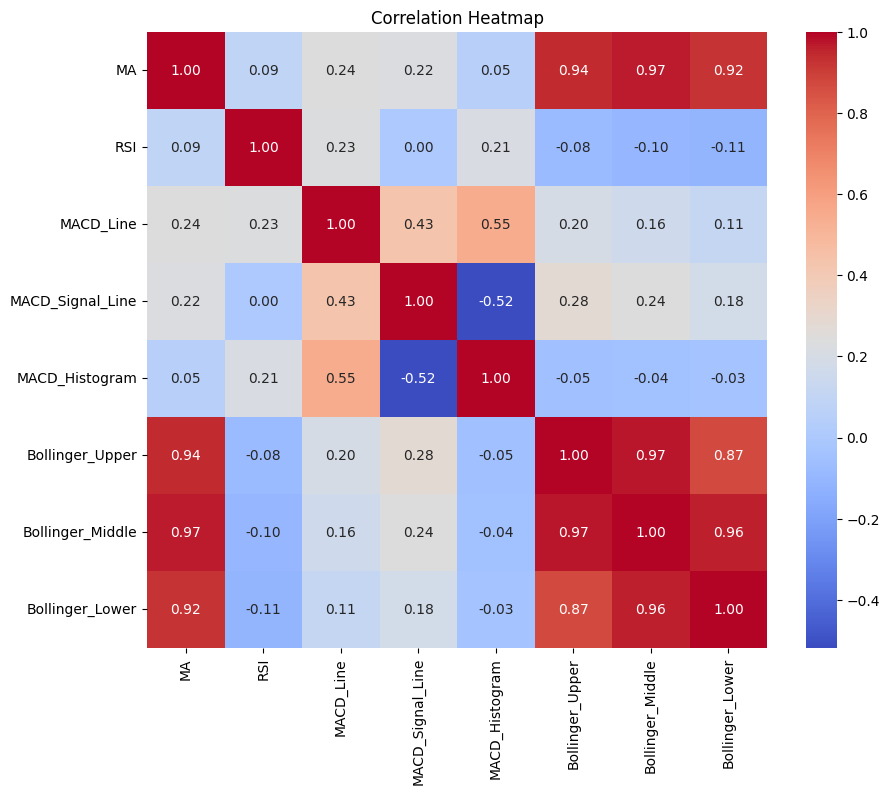

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [17]:
# Bollinger_Middle and MA are same

'''
MA: Positive correlation with MACD_Line, MACD_Signal_Line, Bollinger_Upper, Bollinger_Middle, and Bollinger_Lower.
    Weak positive correlation with RSI and MACD_Histogram.

RSI: Weak positive correlation with MA, MACD_Line, MACD_Histogram, and Bollinger_Lower
     Almost no correlation with MACD_Signal_Line, Bollinger_Upper, and Bollinger_Middle

MACD: MACD_Line and MACD_Signal_Line show a positive correlation with each other
      Positive correlation between MACD indicators and MA
      Positive correlation between MACD_Line and MACD_Histogram
      Negative correlation between MACD_Histogram and MACD_Signal_Line

Bollinger Bands: Strong positive correlation between Bollinger_Upper, Bollinger_Middle, and Bollinger_Lower
                 Positive correlation with MA
                 Almost no correlation with RSI
'''

'\nMA: Positive correlation with MACD_Line, MACD_Signal_Line, Bollinger_Upper, Bollinger_Middle, and Bollinger_Lower.\n    Weak positive correlation with RSI and MACD_Histogram.\n\nRSI: Weak positive correlation with MA, MACD_Line, MACD_Histogram, and Bollinger_Lower\n     Almost no correlation with MACD_Signal_Line, Bollinger_Upper, and Bollinger_Middle\n\nMACD: MACD_Line and MACD_Signal_Line show a positive correlation with each other\n      Positive correlation between MACD indicators and MA\n      Positive correlation between MACD_Line and MACD_Histogram\n      Negative correlation between MACD_Histogram and MACD_Signal_Line\n\nBollinger Bands: Strong positive correlation between Bollinger_Upper, Bollinger_Middle, and Bollinger_Lower\n                 Positive correlation with MA\n                 Almost no correlation with RSI\n'

In [18]:
weights = correlation_matrix.abs().mean(axis=1)
weights /= weights.sum()

# Assuming you have indicator values in another DataFrame indicators_df
# Replace this with your actual DataFrame containing indicator values

# Calculate the combined indicator
combined_indicator = (
    weights * results[selected_columns]
).sum(axis=1)

# Add the combined indicator to your DataFrame
results['Combined_Indicator'] = combined_indicator

# Display the DataFrame with the combined indicator
print(results)


          Date         Open         High          Low        Close  \
0   2021-01-25  2034.949951  2034.949951  1932.000000  1941.000000   
1   2021-01-27  1925.000000  1925.000000  1888.000000  1895.000000   
2   2021-01-28  1880.150024  1923.300049  1870.000000  1876.550049   
3   2021-01-29  1894.300049  1913.099976  1830.000000  1841.949951   
4   2021-02-01  1859.400024  1905.000000  1848.000000  1895.300049   
..         ...          ...          ...          ...          ...   
735 2024-01-15  2750.000000  2792.899902  2732.000000  2788.250000   
736 2024-01-16  2779.949951  2792.600098  2741.000000  2749.250000   
737 2024-01-17  2719.000000  2772.550049  2710.050049  2723.149902   
738 2024-01-18  2702.800049  2742.000000  2702.500000  2735.899902   
739 2024-01-19  2752.000000  2752.000000  2718.000000  2734.899902   

       Adj Close      Volume           MA        RSI   MACD_Line  \
0    1922.178345  25016570.0          NaN   0.000000         NaN   
1    1876.624512  19553

In [19]:
combined_indicator_threshold = results['Combined_Indicator']

# Define bullish and bearish thresholds
bullish_threshold = np.percentile(combined_indicator_threshold, 75)  # You can adjust this percentile
bearish_threshold = np.percentile(combined_indicator_threshold, 25)  # You can adjust this percentile

# Create a new column for predictions
results['Position'] = 'Neutral'

# Set bullish positions
results.loc[results['Combined_Indicator'] > bullish_threshold, 'Position'] = 'Bullish'

# Set bearish positions
results.loc[results['Combined_Indicator'] < bearish_threshold, 'Position'] = 'Bearish'

# Display the DataFrame with the positions
print(results)

          Date         Open         High          Low        Close  \
0   2021-01-25  2034.949951  2034.949951  1932.000000  1941.000000   
1   2021-01-27  1925.000000  1925.000000  1888.000000  1895.000000   
2   2021-01-28  1880.150024  1923.300049  1870.000000  1876.550049   
3   2021-01-29  1894.300049  1913.099976  1830.000000  1841.949951   
4   2021-02-01  1859.400024  1905.000000  1848.000000  1895.300049   
..         ...          ...          ...          ...          ...   
735 2024-01-15  2750.000000  2792.899902  2732.000000  2788.250000   
736 2024-01-16  2779.949951  2792.600098  2741.000000  2749.250000   
737 2024-01-17  2719.000000  2772.550049  2710.050049  2723.149902   
738 2024-01-18  2702.800049  2742.000000  2702.500000  2735.899902   
739 2024-01-19  2752.000000  2752.000000  2718.000000  2734.899902   

       Adj Close      Volume           MA        RSI   MACD_Line  \
0    1922.178345  25016570.0          NaN   0.000000         NaN   
1    1876.624512  19553

In [20]:
threshold = results['Combined_Indicator'].mean()
results['Signal'] = np.where(results['Combined_Indicator'] > threshold, 'L', 'S')
results['Actual_Position'] = np.where(results['Close'].shift(-1) > results['Close'], 'L', 'S')
accuracy = np.mean(results['Signal'] == results['Actual_Position'])
print(f'Accuracy of Prediction: {accuracy * 100:.2f}%')

Accuracy of Prediction: 48.38%


In [21]:
import numpy as np

In [23]:
# Assuming 'data' is your DataFrame
results['Prediction'] = np.where(results['Combined_Indicator'] > threshold, 'L', 'S')

# Save the updated DataFrame to a new CSV file
results.to_csv('financial_analysis_results_with_predictions.csv', index=False)
